Image Project - Seam Carving

In [95]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

Importer l'image

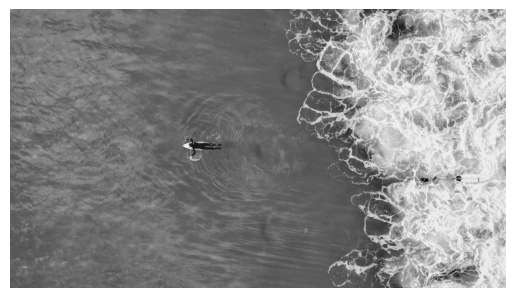

In [96]:
image_path = "Dataset/mer.jpg"
image_array = plt.imread(image_path)
if image_array.ndim == 3:
    image_array = np.mean(image_array, axis=2)  # Conversion simple en niveaux de gris

# Affichage
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

1 - Fonction énergie

In [97]:
#Fonction Energie Entropie
#def energy_entropy(img):

  #def calcul_entropy(region):
    #hist = np.histogram(region, bins=256, range=(0,256))[0]

# image_path = "Dataset/tiger.png"
# image = Image.open(image_path).convert('L')
# image_array = np.array(image)

# plt.imshow(image_array, cmap='gray')
# plt.axis('off')
# plt.show()

# hist = np.histogram(image_array, bins=256, range=(0,256))[0]
# hist = hist / np.sum(hist)
# entropy = -np.sum(hist * np.log2(hist + 1e-10))
# print("Entropy:", entropy)

# def energy_entropy(img):
#   def calcul_entropy(region):
#     hist = np.histogram(region, bins=256, range=(0,256))[0]
#     hist = hist / np.sum(hist)
#     entropy = -np.sum(hist * np.log2(hist + 1e-10))
#     return entropy


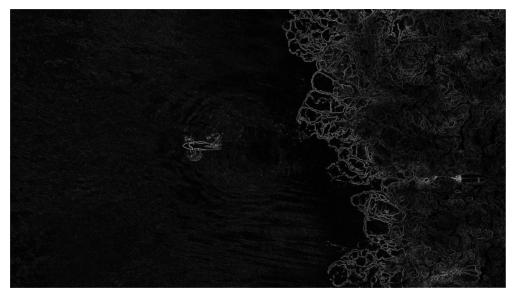

In [98]:
#  Energy function
def energy_basic(img):
  # Initialisation of convolutional matrix
  Cx = np.array([[-0.125, 0, 0.125], [-0.25, 0, 0.25], [-0.125, 0, 0.125]])
  Cy = np.array([[-0.125, -0.25, -0.125], [0, 0, 0], [0.125, 0.25, 0.125]])

  # Convolution of columns and rows
  energyx = convolve2d(img, Cx, mode='same')
  energyy = convolve2d(img, Cy, mode='same')
  energy = np.sqrt(energyx**2 + energyy**2) # Norm 2

  energy_min = np.min(energy)
  energy_max = np.max(energy)
  energy = (energy - energy_min) / (energy_max - energy_min)

  return energy

energybasic = energy_basic(image_array)
plt.imshow(energybasic, cmap='gray')
plt.axis('off')
plt.show()

2 - Fonction minimum d'énergie

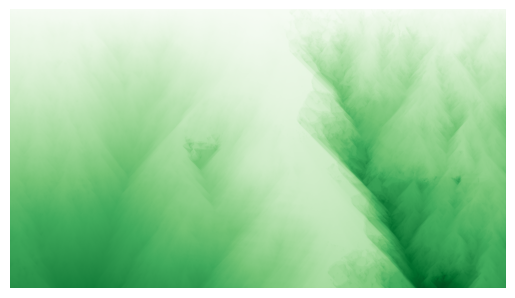

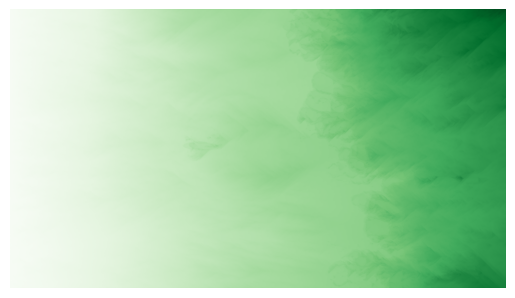

In [99]:
# Version optimisée de creat_mat_energy_V

def creat_mat_energy_V(img):
    L, C = img.shape
    mat_energy = np.zeros((L, C))
    mat_energy[0] = img[0]

    for i in range(1, L):
        left = np.roll(mat_energy[i-1], 1)
        center = mat_energy[i-1]
        right = np.roll(mat_energy[i-1], -1)

        # gestion des bords
        left[0] = center[0]
        right[-1] = center[-1]

        mat_energy[i] = img[i] + np.minimum(np.minimum(left, center), right)

    return mat_energy

# Version optimisée de creat_mat_energy_H

def creat_mat_energy_H(img):
    L, C = img.shape
    mat_energy = np.zeros((L, C))
    mat_energy[:, 0] = img[:, 0]

    for j in range(1, C):
        up = np.roll(mat_energy[:, j-1], 1)
        center = mat_energy[:, j-1]
        down = np.roll(mat_energy[:, j-1], -1)

        # gestion des bords
        up[0] = center[0]
        down[-1] = center[-1]

        mat_energy[:, j] = img[:, j] + np.minimum(np.minimum(up, center), down)

    return mat_energy


mat_energy_V = creat_mat_energy_V(energybasic)
mat_energy_H = creat_mat_energy_H(energybasic)

plt.imshow(mat_energy_V, cmap='Greens')
plt.axis('off')
plt.show()

plt.imshow(mat_energy_H, cmap='Greens')
plt.axis('off')
plt.show()

3 - Seam removing

In [100]:
def removing_V(energy,image):
  img = image.copy()
  L = len(img)
  C = len(img[0])
  remove_list = []
  new_img = np.zeros((L,C-1))
  energy_remove = float(min(energy[L-1]))
  start = int(np.argmin(energy[L-1]))
  remove_list.append(start)
  j = start
  for i in range (L-2,-1,-1):
    if j == 0:
      indice = np.argmin([energy[i,j],energy[i,j+1]])
      if indice == 0:
        remove_list.append(j)
      else:
        remove_list.append(j+1)
        j = j+1
    elif j == C-1:
      indice = np.argmin([energy[i,j-1],energy[i,j]])
      if indice == 0:
        remove_list.append(j-1)
        j = j-1
      else :
        remove_list.append(j)
    else :
      indice = np.argmin([energy[i,j-1],energy[i,j],energy[i,j+1]])
      if indice == 0:
        remove_list.append(j-1)
        j = j-1
      elif indice == 2:
        remove_list.append(j+1)
        j = j+1
      else:
        remove_list.append(j)

  #for i in range (L-1):
    #img[i,remove_list[i]] = 1

  for i in range (L-1):
    c=0
    j=0
    while j != remove_list[i]:
      new_img[i,c] = img[i,j]
      c = c+1
      j=j+1

    j=j+1

    while j < C:
      new_img[i,c] = img[i,j]
      c = c+1
      j=j+1

  return (new_img, energy_remove)



In [101]:
def removing_H(energy,image):
  img = image.copy()
  L = len(img)
  C = len(img[0])
  remove_list = []
  new_img = np.zeros((L-1,C))
  last_column = img[:,C-1]
  energy_remove = float(min(last_column))
  start = int(np.argmin(last_column))
  remove_list.append(start)
  i = start
  for j in range (C-2,-1,-1):
    if i == 0:
      indice = np.argmin([energy[i,j],energy[i+1,j]])
      if indice == 0:
        remove_list.append(i)
      else:
        remove_list.append(i+1)
        i = i+1
    if i == L-1:
      indice = np.argmin([energy[i-1,j],energy[i,j]])
      if indice == 0:
        remove_list.append(i-1)
        i = i-1
      else :
        remove_list.append(i)
    else :
      indice = np.argmin([energy[i,j-1],energy[i,j],energy[i+1,j]])
      if indice == 0:
        remove_list.append(i-1)
        i = i-1
      elif indice == 2:
        remove_list.append(i+1)
        i = i+1
      else:
        remove_list.append(i)

  for j in range (C-1):
    img[remove_list[j], j] = 1


  return (img, energy_remove)

Fonction pour rétrécire l'image

In [102]:
def redox_V (image, nb_pix):
  img = image.copy()
  for i in range (nb_pix):
    energybase = energy_basic(img)
    mat_energy = creat_mat_energy_V(energybase)
    img, e = removing_V(mat_energy, img)

  return img

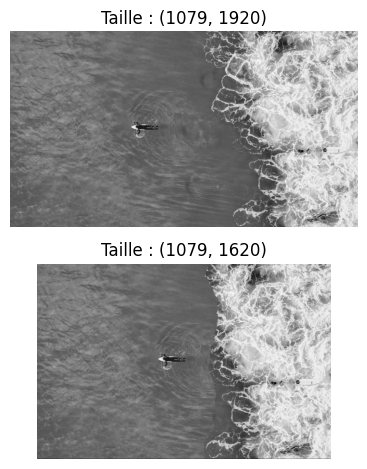

In [103]:
image_reduite = redox_V(image_array, 300)

fig, axs = plt.subplots(2, 1)  # 2 lignes, 1 colonne

axs[0].imshow(image_array, cmap='gray')
axs[0].axis('off')
axs[0].set_title(f'Taille : {image_array.shape}')

axs[1].imshow(image_reduite, cmap='gray')
axs[1].axis('off')
axs[1].set_title(f'Taille : {image_reduite.shape}')

plt.tight_layout()
plt.show()